# Prosper's Loan Data Exploration
## by: Satrio Putra

## Preliminary Wrangling

> This document explores a dataset containing borrower cost of credit and attributes for approximately 113,000 borrowers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Loading Dataset

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df[df.ListingCreationDate < '2009-07-01'].ProsperScore.value_counts()

Series([], Name: ProsperScore, dtype: int64)

In [7]:
df[df.ListingCreationDate < '2009-07-01']['ProsperRating (Alpha)'].value_counts()

Series([], Name: ProsperRating (Alpha), dtype: int64)

In [8]:
df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].head()

,CreditScoreRangeLower,CreditScoreRangeUpper
0,640.0,659.0
1,680.0,699.0
2,480.0,499.0
3,800.0,819.0
4,680.0,699.0


In [9]:
# Finding creadit score range variations
CreditScore_diff = (df.CreditScoreRangeUpper - df.CreditScoreRangeLower)/2
CreditScore_diff.describe()

count    113346.0
mean          9.5
std           0.0
min           9.5
25%           9.5
50%           9.5
75%           9.5
max           9.5
dtype: float64

In [10]:
# Creating credit score column
CreditScore = (df.CreditScoreRangeUpper + df.CreditScoreRangeLower)/2
df['CreditScore'] = CreditScore

In [11]:
#Changing employment status entry
df.EmploymentStatus = df.EmploymentStatus.replace("Not available", np.nan)

In [12]:
#Prosper score range is from 0-10
#Dropping score more than 10
drop = df.ProsperScore == 11
df = df.loc[-drop,:]

# df.ProsperScore = df.ProsperScore.astype(int)
# df.ProsperScore = df.ProsperScore.apply(lambda x: x.split('.')[0])

In [13]:
df.TotalProsperLoans.value_counts()

1.0    15094
2.0     4318
3.0     1346
4.0      381
5.0       88
6.0       23
7.0        6
0.0        1
8.0        1
Name: TotalProsperLoans, dtype: int64

In [14]:
#Changing TotalProsperLoans data type
df.TotalProsperLoans = df.TotalProsperLoans.astype(str)
df.TotalProsperLoans = df.TotalProsperLoans.apply(lambda x: x.split('.')[0])
df.TotalProsperLoans = df.TotalProsperLoans.replace('nan', '0') 

#Changing ListingCreationDate data type to datetime
df.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)
df.ClosedDate = pd.to_datetime(df.ClosedDate)

In [15]:
df['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [16]:
# convert ProsperRating (Alpha) into ordered categorical type
rating_class = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
rating_order = pd.api.types.CategoricalDtype(ordered = True, categories = rating_class)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(rating_order)



### What is the structure of your dataset?

>There are 113937 borrower in the dataset. From the dataset, 13 features will be used:<br>
5 numeric_vars = 'BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'CreditScore'<br>
6 categoric = 'Term', 'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner', 'TotalProsperLoans'<br>

>Variable ProsperRating (Alpha) is ordered factor variables with the following levels.
>(worst) ——> (best) <br>
ProsperRating (Alpha): HR, E, D, C, B, A, AA

### What is/are the main feature(s) of interest in your dataset?

>What i am going to do is searching for variables that are affecting the borrower’s APR.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>I expect that Term and credit score will have the strongest effect on each borrower's APR: the longer the term, the higher the APR, the higher credit score, the lower APR. I also think that the ProsperScore, Employment status, and home ownership, will have effects on the interest, though to a much smaller degree than the main effect of Term.

## Univariate Exploration


In [17]:
df.BorrowerAPR.describe()

count    112456.000000
mean          0.220213
std           0.079851
min           0.006530
25%           0.157840
50%           0.211560
75%           0.285440
max           0.512290
Name: BorrowerAPR, dtype: float64

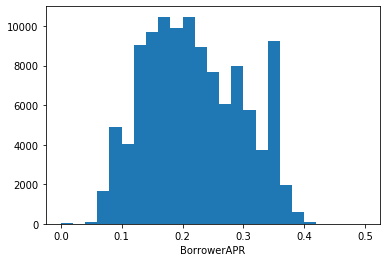

In [18]:
#Plotting BorrowerAPR
bins = np.arange(0, 0.5+0.02, 0.02)
plt.hist(data = df, x = 'BorrowerAPR', bins=bins)
plt.xlabel('BorrowerAPR');

Looks like that most people get 0.2% of APR. We can also see that there is high count for 0.35% APR.

Next variable is Estimated loss.

In [19]:
df.EstimatedLoss.describe()

count    83397.000000
mean         0.081282
std          0.046539
min          0.004900
25%          0.044900
50%          0.072400
75%          0.112000
max          0.366000
Name: EstimatedLoss, dtype: float64

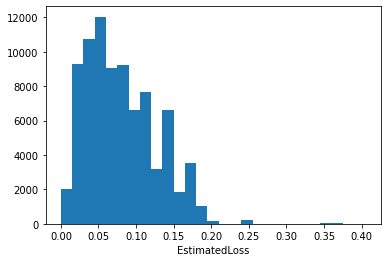

In [20]:
bin_size = 0.015
bins = np.arange(0, 0.4+bin_size, bin_size)
plt.hist(data = df, x = 'EstimatedLoss', bins=bins);
plt.xlabel('EstimatedLoss');

Estimated loss has skewed right distrbution with the highest count is at 0.05%. We can see that there is count in the right, but it is more likely to be outlier. We need to drop that outlier.

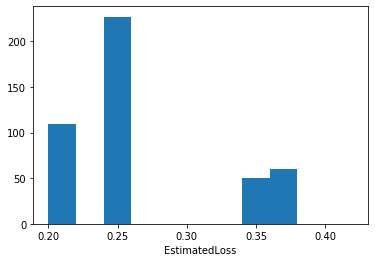

In [21]:
#Finding far right count
bin_size = 0.02
bins = np.arange(0.2, 0.4+bin_size, bin_size)
plt.hist(data = df, x = 'EstimatedLoss', bins=bins);
plt.xlabel('EstimatedLoss');

In [22]:
np.log(df.EstimatedLoss.describe())

count    11.331368
mean     -2.509831
std      -3.067456
min      -5.318520
25%      -3.103317
50%      -2.625549
75%      -2.189256
max      -1.005122
Name: EstimatedLoss, dtype: float64

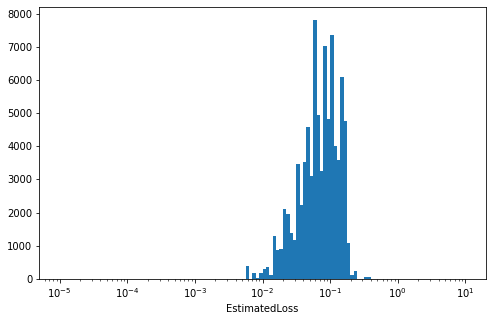

In [23]:
log_binsize = 0.05
bins = 10 ** np.arange(-5, 1+log_binsize, log_binsize)

ticks = [0.003, 0.01, 0.1]
labels = ['{}'.format (v) for v in ticks]

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'EstimatedLoss', bins = bins)
plt.xscale('log')
# plt.xticks(ticks, labels);
plt.xlabel('EstimatedLoss');

In [24]:
#Finding statistic description of the outlier
df[df['EstimatedLoss']>0.2].EstimatedLoss.describe()

count    446.000000
mean       0.261877
std        0.057070
min        0.203000
25%        0.240000
50%        0.240000
75%        0.250000
max        0.366000
Name: EstimatedLoss, dtype: float64

In [25]:
#Listing the outlier
high_outlier = df[df.EstimatedLoss > 0.2]
high_outlier

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScore
354,09543466789756942ED5B40,430051,2009-10-24 06:33:50.757,NaN,36,Completed,2013-05-26,0.37699,0.3400,0.3300,...,-75.95,0.00,0.00,0.0,1.0000,0,0,0.00,56,649.5
527,32543499181220496DBB555,483095,2010-11-05 14:46:00.163,NaN,36,Completed,2011-04-21,0.36783,0.3269,0.3169,...,0.00,0.00,0.00,0.0,1.0000,0,1,1058.77,27,669.5
789,011735172129092481748A3,510659,2011-06-08 08:59:45.023,NaN,36,Chargedoff,2012-04-24,0.35643,0.3199,0.3099,...,0.00,2938.78,2938.78,0.0,0.7876,0,0,0.00,55,709.5
1321,6DD034810270651087DFB9F,452658,2010-04-05 09:10:40.280,NaN,36,Completed,2011-04-29,0.36336,0.3390,0.3290,...,0.00,0.00,0.00,0.0,1.0000,0,1,100.00,60,689.5
1349,0B5C34738042854656430E6,441714,2010-01-08 13:39:38.123,NaN,36,Chargedoff,2012-01-22,0.37453,0.3500,0.3400,...,-5.95,1170.57,1170.57,0.0,1.0000,0,0,0.00,24,609.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113387,DF323501487653892C93A36,485381,2010-11-22 17:23:22.623,NaN,36,Completed,2013-08-22,0.39153,0.3500,0.3400,...,0.00,0.00,0.00,0.0,1.0000,0,0,0.00,17,729.5
113617,C2493464219717831D1AE7D,426289,2009-09-29 12:46:07.890,NaN,36,Completed,2010-02-02,0.37453,0.3500,0.3400,...,0.00,0.00,0.00,0.0,1.0000,0,0,0.00,1,649.5
113754,FFDA34977230634045B6DD9,479483,2010-10-12 18:21:43.497,NaN,36,Completed,2013-01-29,0.28498,0.2500,0.2400,...,0.00,0.00,0.00,0.0,1.0000,2,0,0.00,121,649.5
113842,DF0D3497278986674B6AA3E,481540,2010-10-25 18:14:30.287,NaN,36,Completed,2012-04-13,0.35898,0.2975,0.2875,...,0.00,0.00,0.00,0.0,1.0000,0,0,0.00,54,649.5


In [26]:
#Creating outlier limit
outlier = df.EstimatedLoss > 0.2

In [27]:
#Dropping the outlier
df = df.loc[-outlier,:]

In [28]:
#EstimatedReturn statistic
df.EstimatedReturn.describe()

count    82951.000000
mean         0.097130
std          0.029403
min         -0.028800
25%          0.074900
50%          0.092700
75%          0.117300
max          0.283700
Name: EstimatedReturn, dtype: float64

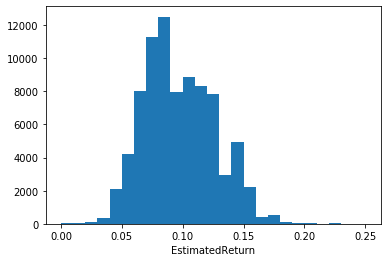

In [29]:
#Plotting EstimatedReturn
bin_size = 0.01
bins = np.arange(0, 0.25+bin_size, bin_size)
plt.hist(data = df, x = 'EstimatedReturn', bins=bins);
plt.xlabel('EstimatedReturn');

There is some data with EstimatedReturn value below zero. This values need to be dropped.

In [30]:
df[df['EstimatedReturn']<0].EstimatedReturn.describe()

count    54.000000
mean     -0.011880
std       0.008195
min      -0.028800
25%      -0.017100
50%      -0.010500
75%      -0.004350
max      -0.000600
Name: EstimatedReturn, dtype: float64

In [31]:
#Listing the outlier
low_outlier = df[df.EstimatedReturn < 0]
low_outlier

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScore
501,089C348555489823736377D,460749,2010-05-30 18:37:24.953,NaN,36,Chargedoff,2013-01-11,0.24807,0.2100,0.2000,...,0.00,383.08,383.08,0.00,1.0,0,0,0.00,31,609.5
760,4685347195009875809A70E,440607,2010-01-01 14:46:53.843,NaN,36,Completed,2011-02-28,0.22491,0.2000,0.1900,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,75,689.5
6331,30E73477967521420B48181,450235,2010-03-12 11:18:17.957,NaN,36,Completed,2013-02-27,0.20260,0.1805,0.1705,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,3,769.5
6562,9D9C34645778963111B6064,427428,2009-10-08 10:53:36.003,NaN,36,Chargedoff,2010-11-18,0.20735,0.1827,0.1727,...,0.00,1329.99,1312.56,0.00,1.0,0,0,0.00,1,649.5
10719,A84234919972024700E788D,469907,2010-08-03 18:26:38.910,NaN,36,Completed,2011-12-20,0.21291,0.1794,0.1694,...,0.00,0.00,0.00,0.00,1.0,1,2,1774.42,53,629.5
11134,16ED3472868394333E87B22,442499,2010-01-14 09:37:49.377,NaN,36,Completed,2013-01-19,0.11155,0.0906,0.0806,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,1,769.5
16377,A97F34930346098313445C1,474439,2010-09-04 08:15:17.333,NaN,36,Completed,2012-01-30,0.14360,0.0895,0.0795,...,0.00,0.00,0.00,0.00,1.0,0,0,0.00,73,789.5
23931,2C34349478569308451A44A,477213,2010-09-27 18:15:12.407,NaN,36,Completed,2011-07-26,0.21352,0.1800,0.1700,...,0.00,0.00,0.00,0.00,1.0,0,1,3000.00,5,669.5
27593,A9E53466316763502ED6515,430228,2009-10-25 23:58:31.463,NaN,36,Chargedoff,2010-09-12,0.20504,0.1829,0.1729,...,-86.18,4140.69,4071.85,408.05,1.0,0,0,0.00,11,749.5
28749,6908345927943412311C27E,420080,2009-08-10 12:20:39.970,NaN,36,Completed,2011-03-09,0.21223,0.1900,0.1800,...,0.00,0.00,0.00,0.00,1.0,1,1,3000.00,8,649.5


In [32]:
#Creating outlier limit
outlier = df.EstimatedReturn < 0

In [33]:
# Dropping the outlier
df = df.loc[-outlier,:]

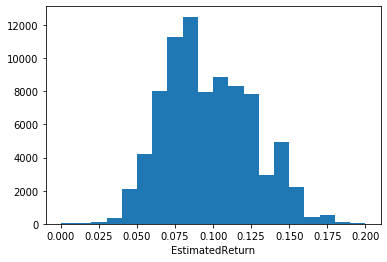

In [34]:
#plotting EstimatedReturn after droping the outlier
bin_size = 0.01
bins = np.arange(0, 0.20+bin_size, bin_size)
plt.hist(data = df, x = 'EstimatedReturn', bins=bins);
plt.xlabel('EstimatedReturn');

We can see better distribution plot after removing the outlier.

In [35]:
df.Term.describe()

count    111981.00000
mean         40.82739
std          10.44790
min          12.00000
25%          36.00000
50%          36.00000
75%          36.00000
max          60.00000
Name: Term, dtype: float64

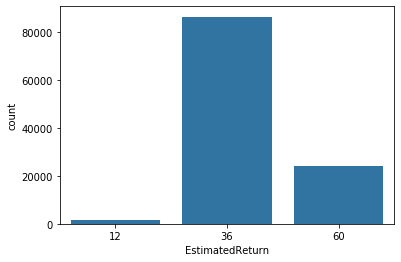

In [36]:
#Plotting Term count
base_color = sb.color_palette()[0]

sb.countplot(data = df, x = 'Term', color = base_color);
plt.xlabel('EstimatedReturn');

In [37]:
df.Term.unique()

array([36, 60, 12], dtype=int64)

Before plotting Term values, i thought this was numerical variable. But it turns out that Term is categorical.

From the plot above, 36 months borrow term is people most favorite borrowing time.

In [38]:
df.IsBorrowerHomeowner.describe()

count     111981
unique         2
top         True
freq       56245
Name: IsBorrowerHomeowner, dtype: object

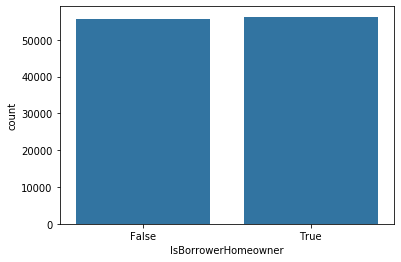

In [39]:
#Plotting IsBorrowerHomeowner variable
base_color = sb.color_palette()[0]

sb.countplot(data = df, x = 'IsBorrowerHomeowner', color = base_color);

Well, nearly half of the borrower have no home ownership.

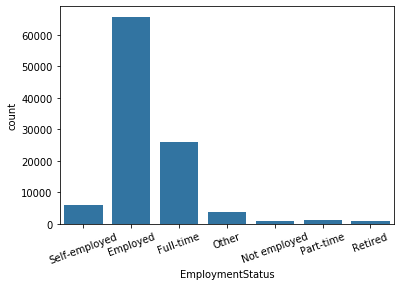

In [40]:
#Plotting EmploymentStatus variable
base_color = sb.color_palette()[0]

sb.countplot(data = df, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation=20);

Well, nearly half of the borrower does not have home.

In [41]:
df.TotalProsperLoans.describe()

count     111981
unique         9
top            0
freq       91012
Name: TotalProsperLoans, dtype: object

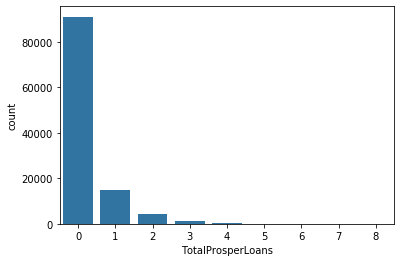

In [42]:
# Plotting TotalProsperLoans variable
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'TotalProsperLoans', color = base_color);

It is good to see that high number of people has no prior loan when proposing loan to Proper.

In [43]:
df.CreditScore.describe()

count    111390.000000
mean        694.597406
std          66.548238
min           9.500000
25%         669.500000
50%         689.500000
75%         729.500000
max         889.500000
Name: CreditScore, dtype: float64

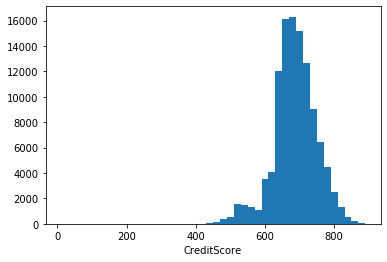

In [44]:
# Plotting CreditScore count
bins = np.arange(10, 890+20, 20)
plt.hist(data = df, x = 'CreditScore', bins=bins);
plt.xlabel('CreditScore');

There is high count of credit score around 680. The distribution is normal. There is some outliers on the left and need to be dropped.

In [45]:
df[df.CreditScore < 400].CreditScore.describe()

count    134.000000
mean      12.186567
std       31.099263
min        9.500000
25%        9.500000
50%        9.500000
75%        9.500000
max      369.500000
Name: CreditScore, dtype: float64

In [46]:
df[df.CreditScore < 369].CreditScore.describe()

count    133.0
mean       9.5
std        0.0
min        9.5
25%        9.5
50%        9.5
75%        9.5
max        9.5
Name: CreditScore, dtype: float64

Looks like 400 is the perfect outlier limit.

In [47]:
# CreditScore_iqr = df.CreditScore.describe()[6] - df.CreditScore.describe()[4]
# CreditScore_low_lim = df.CreditScore.describe()[4] - CreditScore_iqr*1.5
# CreditScore_iqr, CreditScore_low_lim

In [48]:
#Listing the outlier
low_outlier = df[df.CreditScore < 400]
low_outlier

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,CreditScore
794,00EF338150577356881AD6B,97950,2007-02-11 13:40:55.490,NC,36,Completed,2010-02-22,0.29776,0.2900,0.2850,...,0.00,0.00,0.00,0.0,1.0,0,0,0.0,38,9.5
912,7A41337257909407897EB67,61512,2006-11-14 08:23:08.430,NC,36,Defaulted,2007-11-18,0.27276,0.2600,0.2450,...,0.00,1290.20,1290.21,0.0,1.0,0,0,0.0,11,9.5
1685,403F33816853903261A0142,94290,2007-02-06 15:50:46.723,NC,36,Chargedoff,2008-04-20,0.18065,0.1625,0.1575,...,-19.11,846.17,846.19,0.0,1.0,0,0,0.0,64,9.5
4290,4B4C33658186085093BB6B4,7055,2006-04-23 14:19:41.030,NC,36,Chargedoff,2007-12-25,0.24502,0.2375,0.2325,...,0.00,2671.35,2671.35,0.0,1.0,0,0,0.0,24,9.5
4371,985433663733409747DA533,31236,2006-08-14 11:45:59.710,NC,36,Defaulted,2007-09-26,0.24505,0.2325,0.2150,...,0.00,1261.08,1261.07,0.0,1.0,0,0,0.0,50,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109855,FE063379142663462D83FD4,85920,2007-01-17 13:07:35.540,NC,36,Completed,2010-02-08,0.22643,0.2190,0.1840,...,-39.89,0.00,0.00,0.0,1.0,0,0,0.0,30,9.5
110290,7AB333803121117292D39C0,97521,2007-02-10 21:22:12.553,NC,36,Chargedoff,2009-08-22,0.17752,0.1594,0.1244,...,0.00,381.29,381.30,0.0,1.0,0,0,0.0,20,9.5
111624,B4F6337744905877323E37A,82404,2007-01-07 20:33:39.027,NC,36,Defaulted,2007-07-22,0.29776,0.2900,0.2550,...,0.00,3002.00,2921.95,0.0,1.0,0,0,0.0,27,9.5
113714,CD0F3365987359969F50347,34569,2006-08-27 15:26:07.623,HR,36,Chargedoff,2008-11-04,0.28887,0.2695,0.2645,...,0.00,548.30,548.34,0.0,1.0,0,0,0.0,23,369.5


In [49]:
#Creating outlier limit
outlier = df.CreditScore < 400

In [50]:
# Dropping the outlier
df = df.loc[-outlier,:]

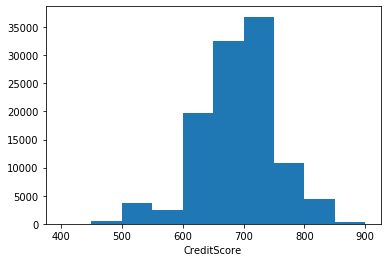

In [51]:
#Plotting CreditScore after dropping outlier
bins = np.arange(400, 890+50, 50)
plt.hist(data = df, x = 'CreditScore', bins=bins);
plt.xlabel('CreditScore');

Look, a better slightly skewed left distribution plot.

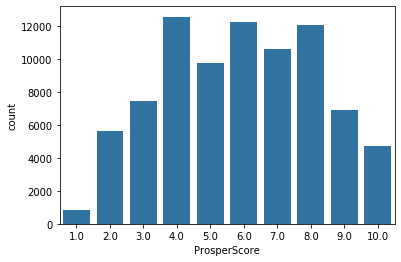

In [52]:
#Plotting ProsperScore count
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'ProsperScore', color=color);
plt.xlabel('ProsperScore');

Plot above showing Prosper loan score for the borrower.

In [53]:
df.ProsperScore.value_counts()

4.0     12581
6.0     12275
8.0     12048
7.0     10596
5.0      9783
3.0      7471
9.0      6910
2.0      5621
10.0     4750
1.0       862
Name: ProsperScore, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!<br>
The most interesting variable is borrowing term. I thought it was continuous numerical data, but the plot suggests that it is a categorical variable. There are only three categories in borrowing term which are 12, 36, and 60 months.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!<br>
There are some variables with outlier lies within the data. This can be known by looking the descriptive statistic, but it is more clearly visible when we plot the distribution. Credit score is the example of it. After I plot the distribution, there is some counts in the far left of distribution. After investigate the credit score data, I found that there is outlier that need to be cleaned. After cleaning outlier, the distribution plot looks better and so would several plots that we will discuss below

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.


In [54]:
#Setting numeric and categorical variable
numeric_vars = ['BorrowerAPR', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'CreditScore']
categoric_vars = ['Term', 'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 'IsBorrowerHomeowner', 'TotalProsperLoans']

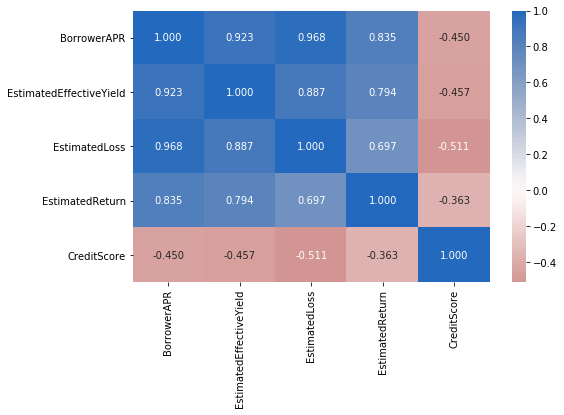

In [55]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

As we can see above, Borrower APR is correlated with estimated loss. I thought that credit score is more correlated with APR better than estimated loss. We need to see relationship between numerical variables through scatter matrix.

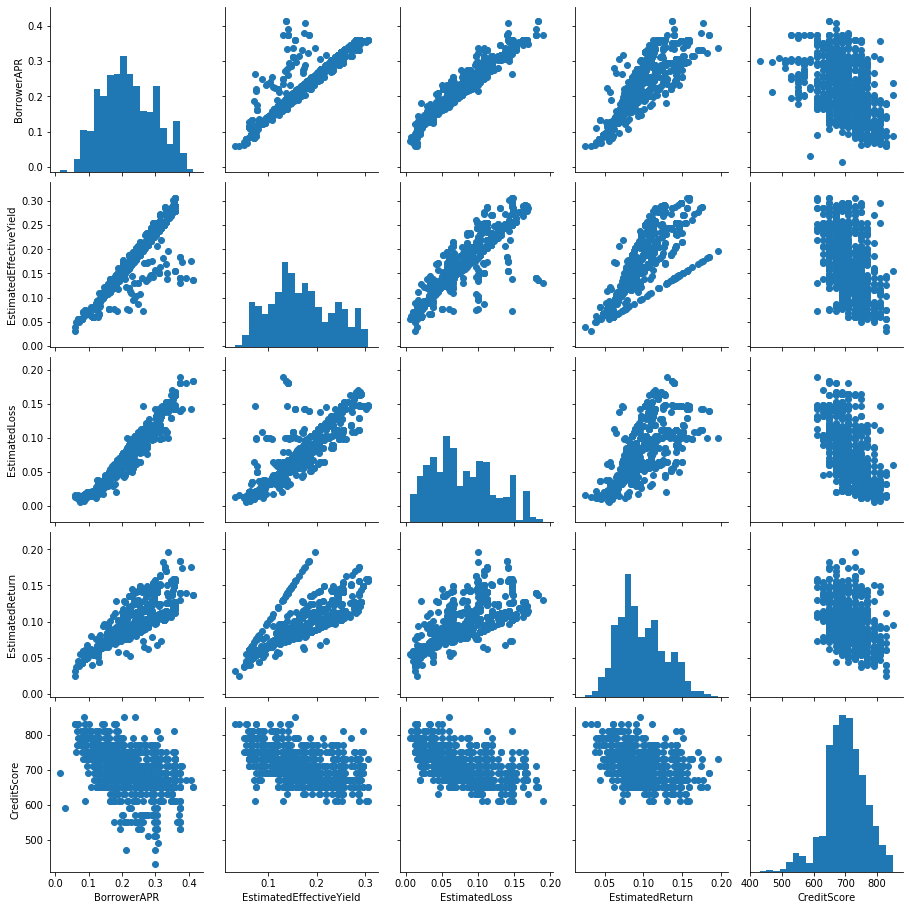

In [56]:
# plot matrix: sample 1000 borrower so that plots are clearer and
# they render faster
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.iloc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

We can see why credit score have lower correlation score than estimated loss. Credit score is scattered around the plot while estimated lost is plot in almost straight line. Now, how about relation between those categorical variable. We need to plot boxplot to see whether there is relationship between them.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

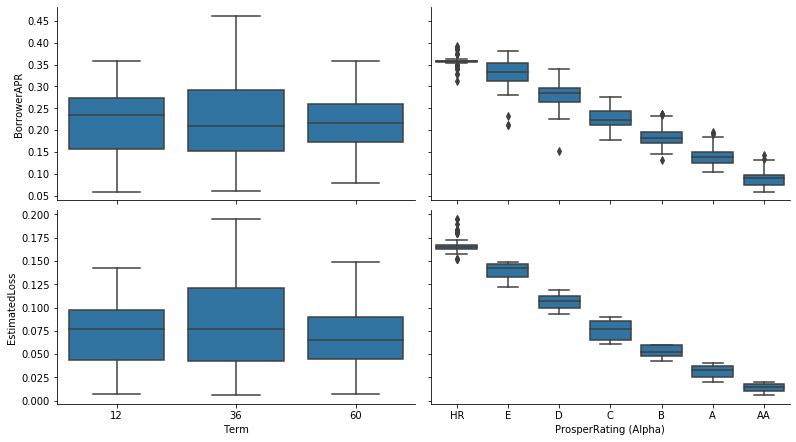

In [57]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

samples = np.random.choice(df.shape[0], 2000, replace = False)
df_samp = df.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'EstimatedLoss'], x_vars = categoric_vars[0:2],
                size = 3, aspect = 1.8)
g.map(boxgrid)
plt.show();

Interestingly, borrower APR and estimated loan loss have negative relationship with Prosper rating. This mean that the higher the rating, the lower the borrower APR so that is also true for lending risk. Meanwhile, the plot suggests that the longer you loan the money, the higher estimated loss which tranlates to higher borrower APR.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

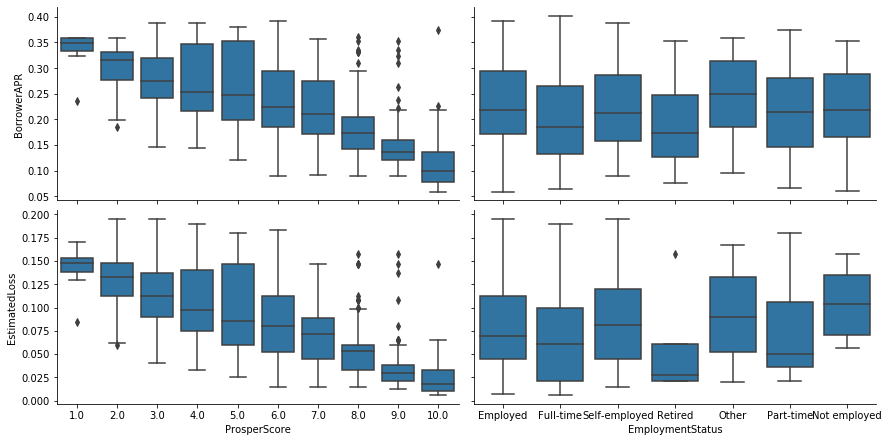

In [58]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'EstimatedLoss'], x_vars = categoric_vars[2:4],
                size = 3, aspect = 2);
g.map(boxgrid);
plt.show();

Negative relationship is also happened between Borrower APR-Prosper Score and estimation loss-Prosper score. Lower score means you get the higher APR. This also means that prosper score reflect borrower trustworthyness. People with full time job get lower lending loss estimation, while they who do not have a job have the highest loss estimation. Interestingly, people who get part time job has lowest loss estimation, but get highest borrowing APR.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

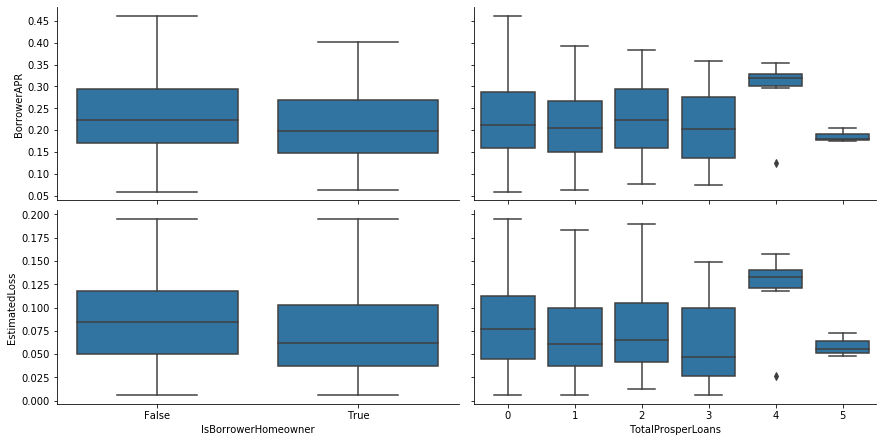

In [59]:
# plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'EstimatedLoss'], x_vars = categoric_vars[4:6],
                size = 3, aspect = 2);
g.map(boxgrid);
plt.show();

Home ownership means lower APR and for the borrower loss estimation for the lender. The plot suggest that people who has 3 loan prior the listing has lowest loss estimation and APR. Higher than that, you get highest loss estimation and so does APR.

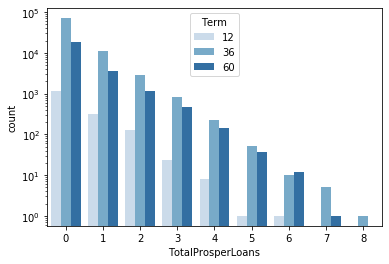

In [60]:
sb.countplot(data = df, x = 'TotalProsperLoans', hue = 'Term', palette = 'Blues')
plt.yscale('log')

36 months borrowing term is the most favorite option for the borrower whether you have zero loan or 8 prior loan. The second favorite option is 60 months borrowing term.

Text(0.5, 1.0, 'EmploymentStatus count by Term')

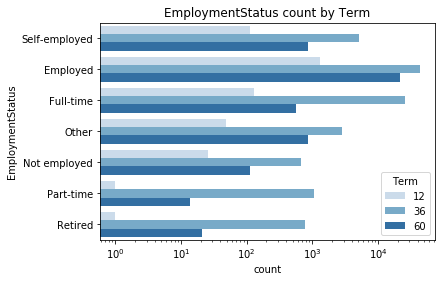

In [61]:
sb.countplot(data = df, y = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xscale('log')
plt.title('EmploymentStatus count by Term')

The most favorite borrowing term is also the same for people with different occupation status. 36 months borrowing term is being the most favorite option while the 60 months is being the second.

Text(0.5, 1.0, 'Home Ownership count by Term')

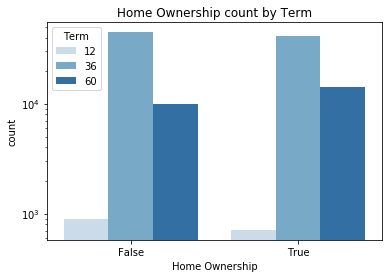

In [62]:
sb.countplot(data = df, x = 'IsBorrowerHomeowner', hue = 'Term', palette = 'Blues')
plt.yscale('log')
plt.xlabel('Home Ownership')
plt.title('Home Ownership count by Term')

Well, that statement above is also true between people who owns property and also who does not.

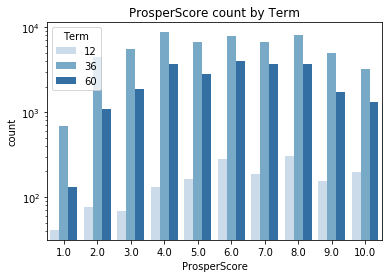

In [63]:
sb.countplot(data = df, x = 'ProsperScore', hue = 'Term', palette = 'Blues')
plt.yscale('log')
plt.title('ProsperScore count by Term');

Not forget to mention that statement above is also true across all Prosper score from the lowest to the highest. 36 months borrowing term is the most favorite option for all people.

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. First, I want to see how APR is related to one another for all of the data.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  after removing the cwd from sys.path.


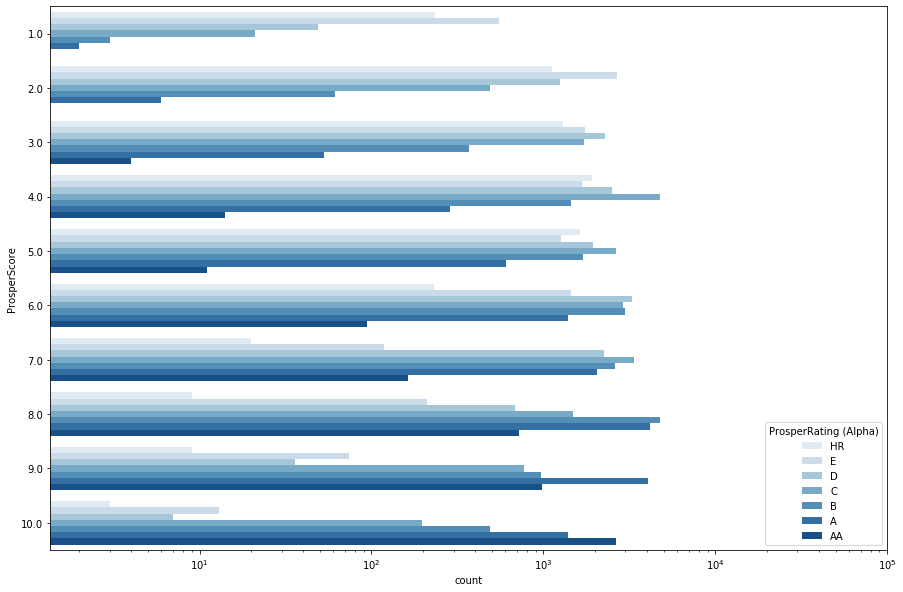

In [64]:
plt.figure(figsize=(15,10))
sb.countplot(data = df, y = 'ProsperScore', hue = 'ProsperRating (Alpha)', palette = 'Blues')
plt.xscale('log')
plt.xlim(0,100000);

There is relationship between ProsperRating and ProsperScore as we can see on plot above. On lower Prosper score, we have higher count on lower Prosper rating. While on higher Prosper score, we got higher count on higher Prosper rating.

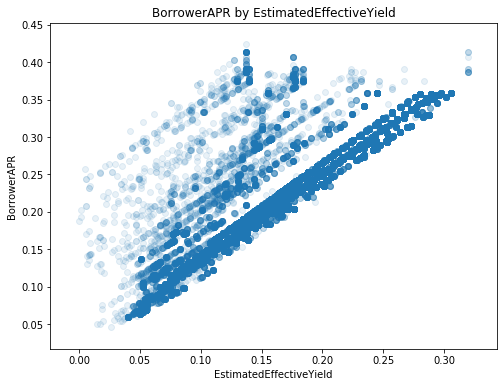

In [65]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'EstimatedEffectiveYield', y = 'BorrowerAPR', alpha = 1/10)
plt.xlabel('EstimatedEffectiveYield')
plt.title('BorrowerAPR by EstimatedEffectiveYield')
plt.ylabel('BorrowerAPR')
plt.show();

We can see linear relationship between estimate effective yield and borrower APR. We can also see thin line above the thick line. We should pair those two variable with a categorical variable.

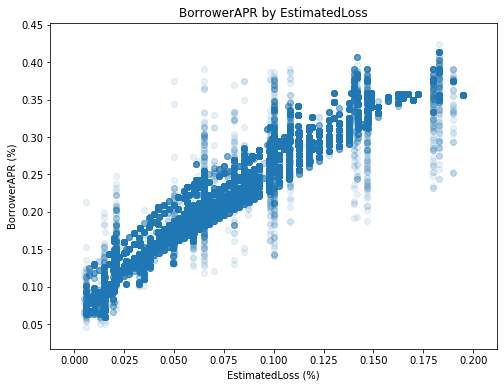

In [66]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'EstimatedLoss', y = 'BorrowerAPR', alpha = 1/10)
# plt.xlim([0, 3.5])
plt.xlabel('EstimatedLoss (%)')
plt.title('BorrowerAPR by EstimatedLoss')
plt.ylabel('BorrowerAPR (%)')
plt.show();

The plot suggest strong posotive relationship between estimated loss and borrower APR.

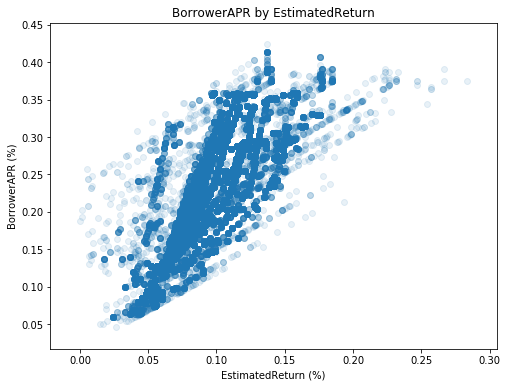

In [67]:
plt.figure(figsize = [8, 6])
plt.scatter(data = df, x = 'EstimatedReturn', y = 'BorrowerAPR', alpha = 1/10)
# plt.xlim([0, 3.5])
plt.xlabel('EstimatedReturn (%)')
plt.title('BorrowerAPR by EstimatedReturn')
plt.ylabel('BorrowerAPR (%)')
plt.show();

The plot suggest positive relationship between estimated return and borrower APR. This relationship is not as good as what depicted in the prior plot.

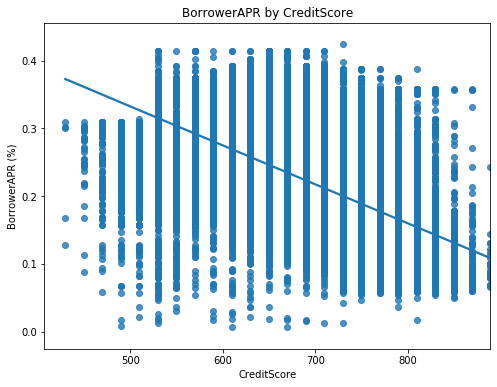

In [68]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'CreditScore', y = 'BorrowerAPR')
# plt.xlim([0, 3.5])
plt.xlabel('CreditScore')
plt.ylabel('BorrowerAPR (%)')
plt.title('BorrowerAPR by CreditScore')
plt.show();

This variable is what i though to be the best predictor of borrower APR. But as we can see in the plot above, relationship between credit score and borrower APR is not clear. That is why i added regression plot to help understanding the relationship between two variables above.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The longer lending term you chose, the higher APR you got. This could be because lender get higher uncertainty the longer you borrow their money. Other variable that i am interested is credit score. While it has negative relationship coefficient with APR just as my prediction, it has lower value than other variables such loss estimation or return estimation. When we plot the APR by credit score, we can that the score is scatered and not showing clear line.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>The Prosper rating and Prosper score can be used to see whether you got the best APR or lender get the best investment. Higher rating or score means you get lower APR and also less loss approximation for the lender.<br>
There is relationship between ProsperRating and ProsperScore as we can see on plot above. On lower Prosper score, we have higher count on lower Prosper rating. While on higher Prosper score, we got higher count on higher Prosper rating.

## Multivariate Exploration

>The main thing I want to explore in this part of the analysis is how the three categorical measures of quality play into the relationship between APR and loss estimation.

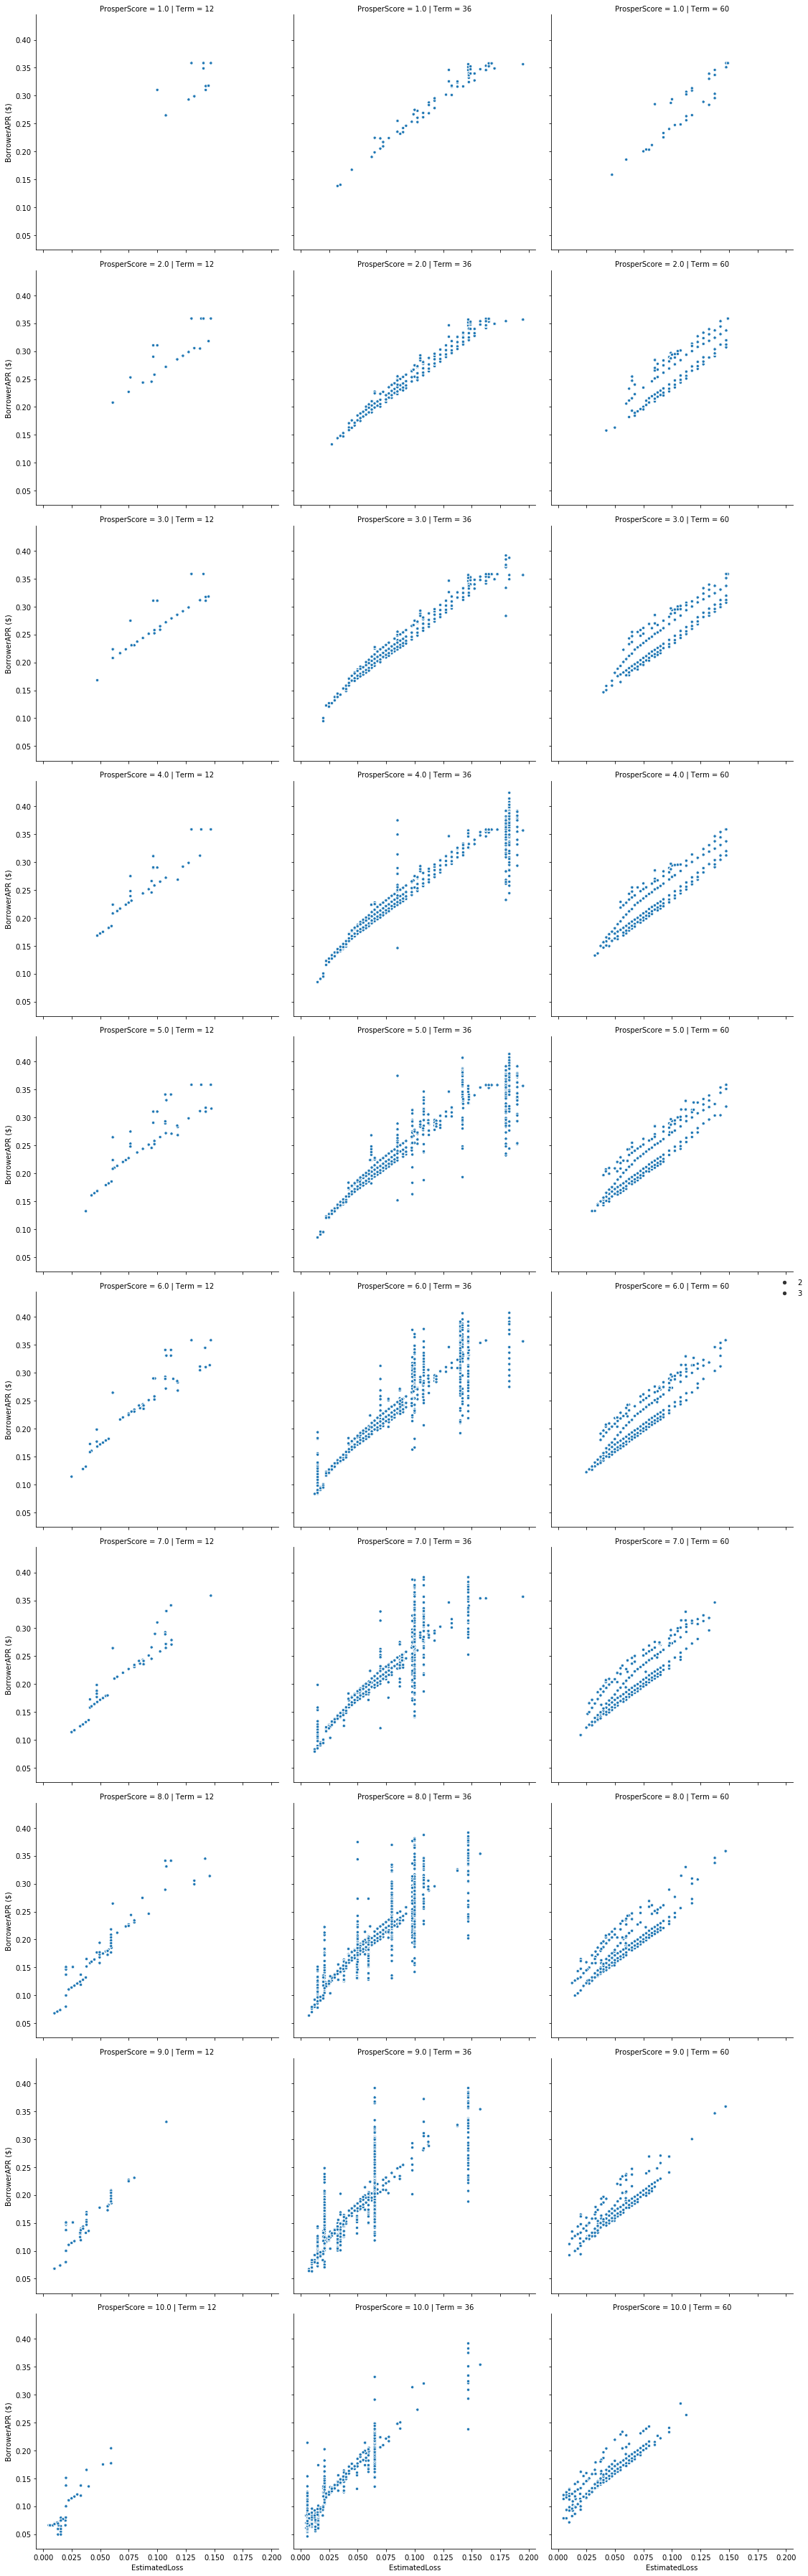

In [69]:
g = sb.relplot(data = df, x = 'EstimatedLoss', y ='BorrowerAPR' , col= 'Term', row ='ProsperScore', size = 3)
# g = (g.map(plt.scatter, 'CreditScore', 'BorrowerAPR')).add_legend()
g.set_xlabels('EstimatedLoss')
g.set_ylabels('BorrowerAPR ($)')
g.add_legend();

In [70]:
df1 = df.query('ProsperScore == 1 or ProsperScore == 5 or ProsperScore == 10')

The first multivariate plot above suggests that estimated loss is better predicted in lower score category. The plot shows better and clear relationship between estimated loss and borrower APR in that category.

We can see that credit score shows better correlation with borrower APR in higher Prosper score category than the lower in all borrowing term. In the lower score category, the plot is spreaded and makes the relationship unclear.

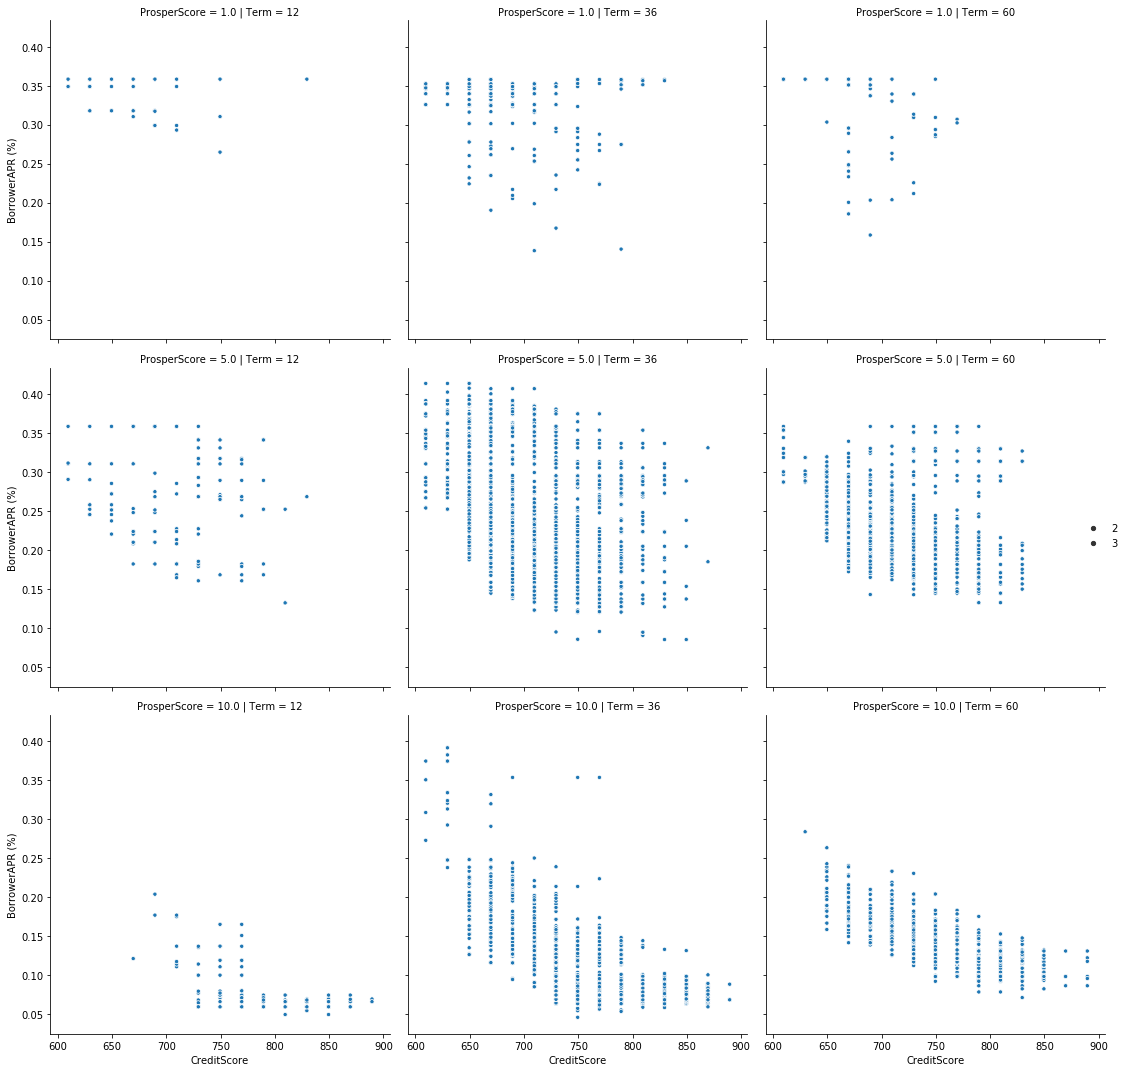

In [71]:
g = sb.relplot(data = df1, x = 'CreditScore', y ='BorrowerAPR' , col= 'Term', row ='ProsperScore' , size = 3)
# g = (g.map(plt.scatter, 'CreditScore', 'BorrowerAPR')).add_legend()
g.set_xlabels('CreditScore')
g.set_ylabels('BorrowerAPR (%)')
g.add_legend();

In [72]:
# select diamonds of approximately 1 carat
score_flag = df['ProsperScore'] == df['ProsperScore'].max()
df_score_max = df.loc[score_flag,:]

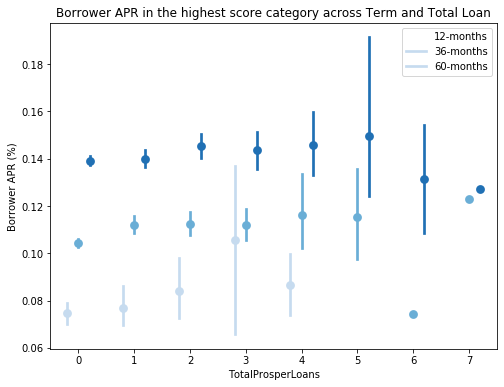

In [73]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_score_max, x = 'TotalProsperLoans', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR in the highest score category across Term and Total Loan')
plt.ylabel('Borrower APR (%)')
plt.legend(['12-months', '36-months', '60-months']);

In [74]:
# select diamonds of approximately 1 carat
score_flag = df['ProsperScore'] == df['ProsperScore'].min()
df_score_max = df.loc[score_flag,:]

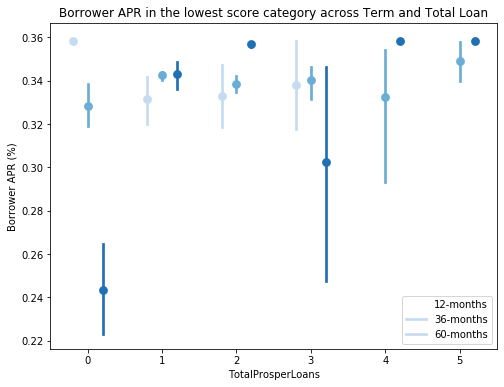

In [75]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df_score_max, x = 'TotalProsperLoans', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Borrower APR in the lowest score category across Term and Total Loan')
plt.ylabel('Borrower APR (%)')
plt.legend(['12-months', '36-months', '60-months']);

There is no clear distinction of borrowing APR between 12-months, 36-months, and 60-months borrowing term for people in the lowest Prosper score. While you can find regularity in the plot for highest Prosper score. We can see that there is distance between the terms in highest score category. It is interesting that people can get lower APR for 60-months for the first lending and the fourth lending in lowest score category.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The borrowing term is better predicting APR for people in higher Prosper category and credit score is also better predicting APR in that category. In lower score category, those variable show weak relationship with APR.


### Were there any interesting or surprising interactions between features?

> Loss estimation is better predicting borrower APR in lower Prosper score category. As we can see above, relationship between loss estimation is getting clear from high score to the lower score.